In [1]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, SVR
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, \
RocCurveDisplay, roc_auc_score, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
os.chdir('C:/Users/dbda.STUDENTSDC/Desktop/M.L/Datasets')
boston = pd.read_csv('Boston.csv')

boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [11]:
x, y = boston.drop('medv', axis = 1), boston.medv

ss = StandardScaler().set_output(transform='pandas')
x = ss.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=25)

In [7]:
depths = [None, 3,4,5,6,7]
min_samples = [2,10,0.025,0.01,0.05,0.1]
min_leaf = [1,10,0.025,0.01,0.05,0.1]
scores = []
for d in tqdm(depths):
    for ms in min_samples:
        for ml in min_leaf:
            dtr = DecisionTreeRegressor(random_state=25, max_depth=d, min_samples_split=ms, min_samples_leaf=ml)
            dtr.fit(x_train, y_train)
            y_pred = dtr.predict(x_test)
            scores.append([d,ms,ml,mean_absolute_error(y_test, y_pred)])

df_score = pd.DataFrame(scores, columns=['depth', 'min_sample_split', 'min_sample_leaf', 'score'])
df_score.sort_values('score', ascending=True)

100%|██████████| 6/6 [00:00<00:00,  8.55it/s]


,depth,min_sample_split,min_sample_leaf,score
109,5.0,2.000,10.0,2.637731
127,5.0,0.010,10.0,2.637731
121,5.0,0.025,10.0,2.637731
115,5.0,10.000,10.0,2.637731
133,5.0,0.050,10.0,2.637731
...,...,...,...,...
71,3.0,0.100,0.1,3.651498
47,3.0,10.000,0.1,3.651498
41,3.0,2.000,0.1,3.651498
53,3.0,0.025,0.1,3.651498


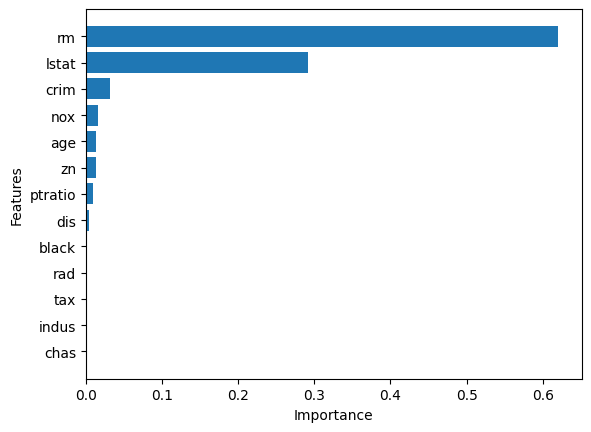

In [12]:
best_tree = DecisionTreeRegressor(random_state=25, max_depth=5, min_samples_split=2, min_samples_leaf=10)
best_tree.fit(x, y)

df_imp = pd.DataFrame({'Feature': list(x.columns), 'Importance': best_tree.feature_importances_})
df_imp = df_imp.sort_values('Importance')
plt.barh(df_imp['Feature'], df_imp['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()